In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [38]:
# import data ignoring the first row
df = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='hodgepodge_no_missing', skiprows=1)
X = df.iloc[:, 5:]

# extract cases group name are "SNC" and "AD"
Xo = df[df['group'].isin(['SNC', 'AD'])]
# count how many cases in each group
print(Xo['group'].value_counts())
X = Xo.iloc[:, 5:]
df.head()

AD     11
SNC    10
Name: group, dtype: int64


,number,group,caseid,M_sex_recode,M_Sex,M_W4_Age,M_W4_Education,Z_Attention,Z_Executive,Z_Language,...,wdc_HIP_R,wdc_PHG_L,wdc_PHG_R,wdc_AMY_L,wdc_AMY_R,wdc_sTEMp_L,wdc_sTEMp_R,wdc_mTEMp_L,wdc_mTEMp_R,wdc_average
0,1.0,SNC,2820A,0.0,Female,78.587269,9.0,1.29,0.66,1.04,...,124.32300,103.84853,134.8445,59.73196,35.80771,39.74140,50.59918,41.3377,80.1732,90.075536
1,2.0,SNC,3168A,0.0,Female,84.793977,6.0,-0.72,-0.30,-0.11,...,181.14100,127.94480,168.0533,76.11546,96.88896,60.16440,180.20210,97.6875,201.0259,114.193858
2,3.0,SNC,3358A,1.0,Male,93.869952,14.0,-0.46,1.62,1.50,...,97.67414,94.51230,113.1504,42.43014,63.60780,40.69170,66.24880,39.3636,115.5613,73.604142
3,4.0,SNC,3610A,0.0,Female,77.891855,14.0,1.90,1.07,1.07,...,81.19780,67.55110,95.6603,41.69030,39.98160,76.52960,68.48040,42.9908,70.6835,69.997263
4,5.0,SNC,4073A,0.0,Female,78.910335,11.0,0.04,0.00,0.69,...,94.63370,164.84140,111.8518,77.54690,52.54886,76.56341,106.85250,70.9745,99.5983,99.907296


### Ignition over groups

         aCNG-R    aCNG-L    mCNG-R    mCNG-L    pCNG-R    pCNG-L     HIP-R  \
group                                                                         
AD     0.636831  0.635169  0.634752  0.634410  0.637969  0.633605  0.637263   
MCI    0.654210  0.654250  0.652852  0.656794  0.655742  0.659713  0.652770   
NC     0.661101  0.659658  0.661287  0.663369  0.666429  0.665708  0.663589   
SNC    0.667118  0.667752  0.661091  0.668546  0.669523  0.663211  0.665762   

          HIP-L     PHG-R     PHG-L     AMY-R     AMY-L   sTEMp-R   sTEMp-L  \
group                                                                         
AD     0.634857  0.636134  0.632188  0.633855  0.632522  0.632994  0.631063   
MCI    0.654093  0.652612  0.652892  0.654069  0.655794  0.655750  0.657336   
NC     0.659152  0.662076  0.661656  0.658868  0.660320  0.658042  0.661884   
SNC    0.666218  0.669226  0.665041  0.662141  0.666585  0.662443  0.661916   

        mTEMp-R   mTEMp-L  ignition_left  ignition

/var/folders/s2/p1qgp3rx7wz63mc5wkrqb7yw0000gp/T/ipykernel_20825/2237847184.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ig_mean = df_ig.groupby('group').mean()
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


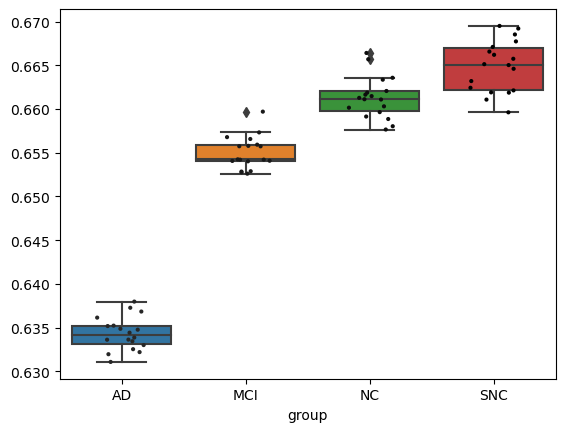

aCNG-R: 0.03028674605066628
aCNG-L: 0.03258277198653592
mCNG-R: 0.026339382061945638
mCNG-L: 0.034135924644387416
pCNG-R: 0.03155431457140356
pCNG-L: 0.029605810931614185
HIP-R: 0.028498718512229737
HIP-L: 0.031360235460077046
PHG-R: 0.033091821303332325
PHG-L: 0.03285338815232308
AMY-R: 0.028286553996944908
AMY-L: 0.034062861051754045
sTEMp-R: 0.02944899061639117
sTEMp-L: 0.030852749797950496
mTEMp-R: 0.027686474581290033
mTEMp-L: 0.028268555655203587


In [4]:
df_ig = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='Ignition')
# take mean of each group
df_ig_mean = df_ig.groupby('group').mean()
print(df_ig_mean)
sns.boxplot(data=df_ig_mean.T)
sns.stripplot(data=df_ig_mean.T, color='black', size=3, jitter=0.2)
plt.show()

for i in range(16):
    print(f"{df_ig_mean.columns[i]}: {df_ig_mean.iloc[3, i] - df_ig_mean.iloc[0, i]}")

### Individual metrics

In [5]:
# for column in df.columns:
#     if column not in ['number','group', 'caseid','M_sex_recode','M_Sex']:  # skip the group column
#         plt.figure(figsize=(5,5))
#         sns.violinplot(x='group', y=column, data=df)
#         sns.pointplot(x='group', y=column, data=df, color='red')
#         sns.stripplot(x='group', y=column, data=df, size=4,jitter=True, color='black')
#         plt.title(f'Distribution of {column} by Group')
#         plt.show()

### Define the trends

In [46]:
df_trends = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='trends')
df_trends.head()
# in df_trends, get the num value when linear column is "1"
linear_included = df_trends[df_trends['type2'] == 1].num.to_numpy()
Xl = Xo.iloc[:, 5:]
# use linear_inlcuded to filter df
df_linear = Xl.iloc[:, linear_included]
X = df_linear.to_numpy()
Xl = Xl.to_numpy()

### Linear regression to calculate r squared of each metric

In [50]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame df with your data,
# and 'target' is your target variable
# and 'feature' is the feature you want to test

y = np.array([1 if x == "SNC" else 0 for x in list(Xo.group)])

# Initialize a linear regression model
model = LinearRegression()
for i in range(Xl.shape[1]):
    # Fit the model to the data
    model.fit(Xl[:,i].reshape(-1,1), y)

    # Predict the target variable
    y_pred = model.predict(Xl[:,i].reshape(-1,1))

    # Calculate the R-squared score
    r2 = r2_score(y, y_pred)

    print('R-squared: ',Xo.columns[i+5] , r2)


R-squared:  M_W4_Age 0.03936908923244975
R-squared:  M_W4_Education 0.006780778770817619
R-squared:  Z_Attention 0.3268779815239037
R-squared:  Z_Executive 0.39678033764226284
R-squared:  Z_Language 0.5745388629512702
R-squared:  Z_Memory 0.7765344457216588
R-squared:  Z_Visuospatial 0.7130106434700463
R-squared:  ignition_aCNG-R 0.2760788366373136
R-squared:  ignition_aCNG-L 0.2435909203166059
R-squared:  ignition_mCNG-R 0.16136237379946028
R-squared:  ignition_mCNG-L 0.214295240982475
R-squared:  ignition_pCNG-R 0.23240916180377302
R-squared:  ignition_pCNG-L 0.22052734450478517
R-squared:  ignition_HIP-R 0.15768200126923926
R-squared:  ignition_HIP-L 0.18657371956677649
R-squared:  ignition_PHG-R 0.24376569352411803
R-squared:  ignition_PHG-L 0.24195159760408524
R-squared:  ignition_AMY-R 0.145265977358367
R-squared:  ignition_AMY-L 0.2572669273248447
R-squared:  ignition_sTEMp-R 0.20384615264843498
R-squared:  ignition_sTEMp-L 0.24896885293097903
R-squared:  ignition_mTEMp-R 0.1946

### Multivariate ANOVA

In [51]:
print(Xo)

    number group caseid  M_sex_recode   M_Sex   M_W4_Age  M_W4_Education  \
0      1.0   SNC  2820A           0.0  Female  78.587269             9.0   
1      2.0   SNC  3168A           0.0  Female  84.793977             6.0   
2      3.0   SNC  3358A           1.0    Male  93.869952            14.0   
3      4.0   SNC  3610A           0.0  Female  77.891855            14.0   
4      5.0   SNC  4073A           0.0  Female  78.910335            11.0   
5      6.0   SNC  4481A           1.0    Male  83.367556            17.0   
6      7.0   SNC  4849A           0.0  Female  85.305955            15.0   
7      8.0   SNC  5184A           0.0  Female  78.778919            11.0   
8      9.0   SNC  6171A           1.0    Male  85.023956            22.0   
9     10.0   SNC  8709A           0.0  Female  81.514031            14.0   
56    62.0    AD  0306A           0.0  Female  95.679671             6.0   
57    63.0    AD  0506A           1.0    Male  88.821355            12.0   
58    64.0  

In [53]:
from statsmodels.multivariate.manova import MANOVA

# add the intercept
Xo['group'] = ['trt ' + str(x) for x in Xo['group']]
# fit manova
manova_result = MANOVA.from_formula('Z_Attention + Z_Executive + Z_Language + Z_Memory + Z_Visuospatial ~ group', data=Xo)
print(manova_result.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1933 5.0000 15.0000 12.5219 0.0001
         Pillai's trace 0.8067 5.0000 15.0000 12.5219 0.0001
 Hotelling-Lawley trace 4.1740 5.0000 15.0000 12.5219 0.0001
    Roy's greatest root 4.1740 5.0000 15.0000 12.5219 0.0001
------------------------------------------------------------
                                                            
------------------------------------------------------------
         group          Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1294 5.0000 15.0000 20.1908 0.0000
         Pillai's trace 0.8706 5.0000 15.0000 20.1908 0.0000
 Hotelling-Lawley trace 6.7303 5.0000 15.0

/var/folders/s2/p1qgp3rx7wz63mc5wkrqb7yw0000gp/T/ipykernel_20825/1160615550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xo['group'] = ['trt ' + str(x) for x in Xo['group']]


### UMAP + kmeans to classify SNC and AD

In [7]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA. Let's say we want to reduce the dimensions to 2
pca = PCA(n_components=10)

# Fit and transform the data
df_pca = pca.fit_transform(X)

embedding = df_pca

In [8]:
# use unsupervised learning to cluster the data


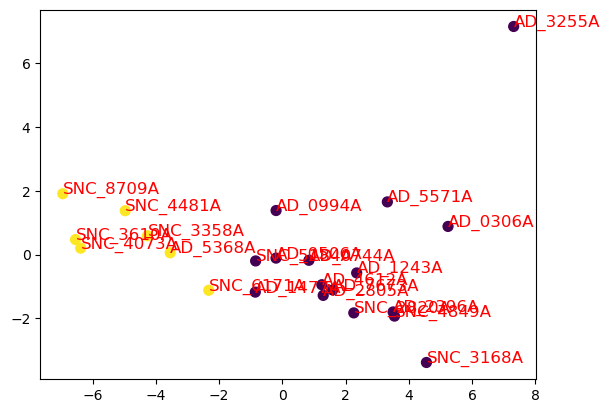

In [9]:
# # Apply UMAP
# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(X)

# Define KMeans object
kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=3000, 
    tol=1e-04, random_state=0
)

# Compute k-means clustering on the UMAP reduced data
y_km = kmeans.fit_predict(embedding)

labels = [str(list(Xo.group)[n])+"_"+str(list(Xo.caseid)[n]) for n in range(len(Xo.group))]

# Create a scatter plot for each cluster
n=0

# Visualizing the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_km, s=50, cmap='viridis')

# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# Display the plot
plt.show()



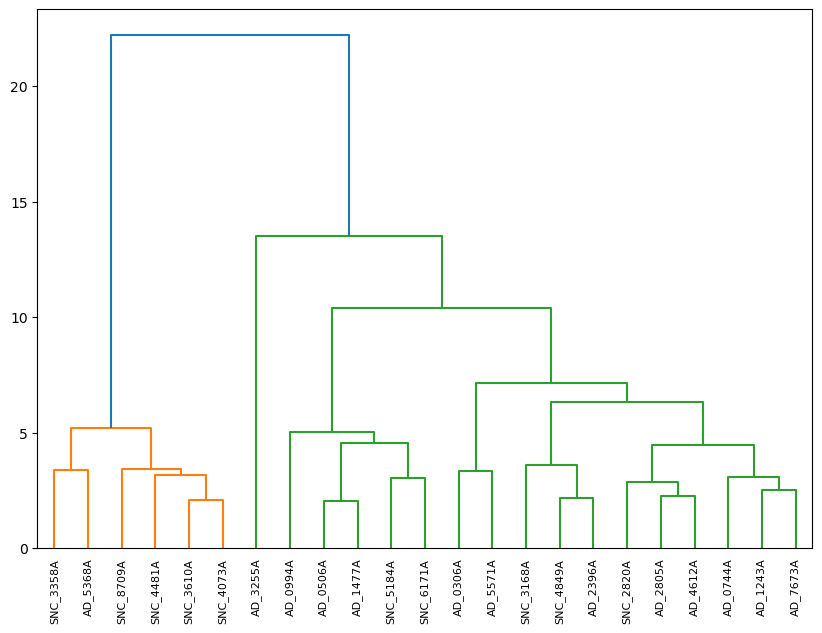

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using the 'ward' method
Z = linkage(embedding, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=labels, leaf_rotation=90, leaf_font_size=8)

# Show the plot
plt.show()

### Birch
Balanced Iterative Reducing and Clustering using Hierarchies

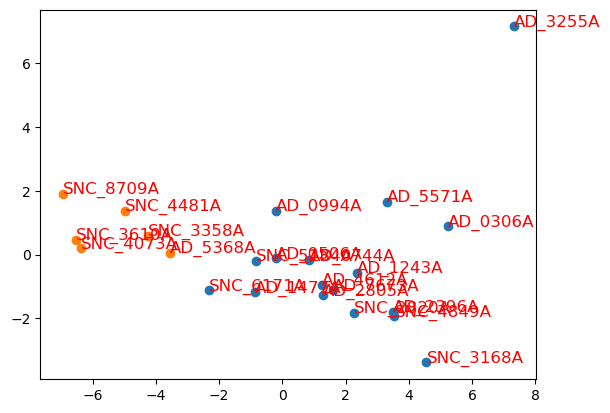

In [11]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(embedding)
# assign a cluster to each example
yhat = model.predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
  row_ix = np.where(yhat == cluster)
 # create scatter of these samples
  plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

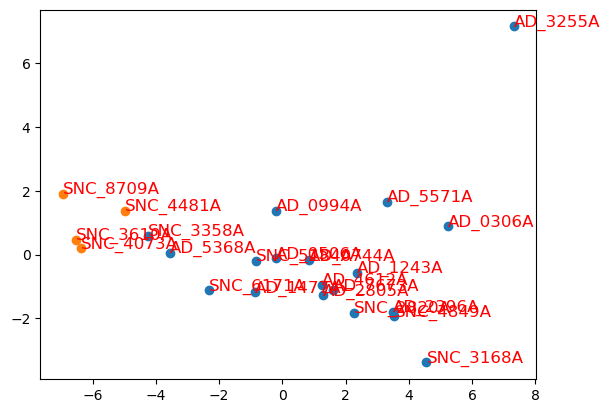

In [12]:
from sklearn.cluster import SpectralClustering
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
 # create scatter of these samples
    plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

### Gaussian Mixture Model

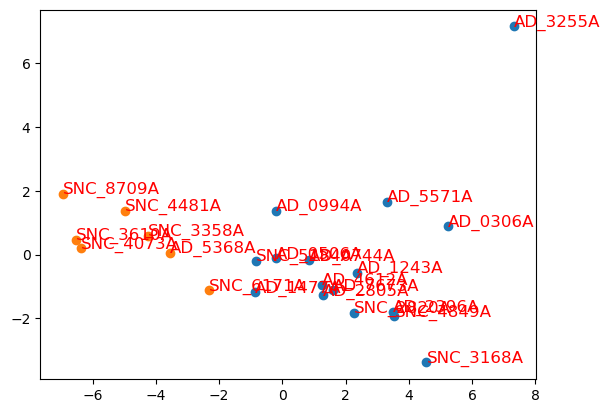

In [13]:
from sklearn.mixture import GaussianMixture

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(embedding)
# assign a cluster to each example
yhat = model.predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
 # create scatter of these samples
    plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

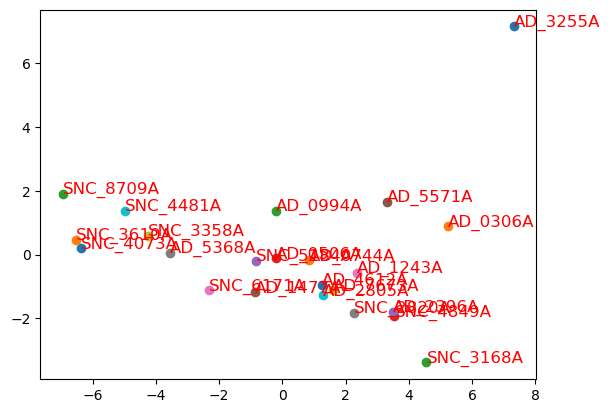

In [14]:
from sklearn.cluster import MeanShift

# define the model
model = MeanShift(bandwidth=1.5)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
   row_ix = np.where(yhat == cluster)
 # create scatter of these samples
   plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')
# show the plot
plt.show()

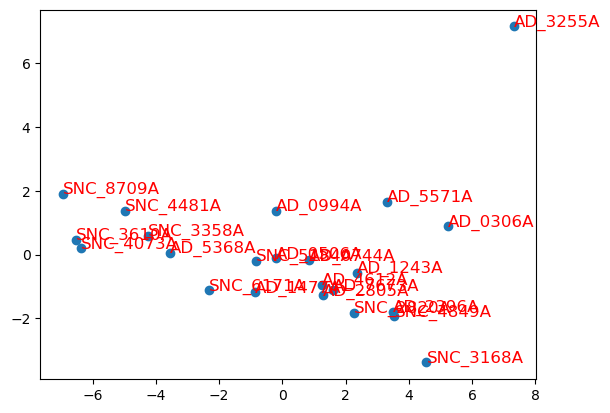

In [15]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=2, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
   row_ix = np.where(yhat == cluster)
 # create scatter of these samples
   plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')
# show the plot
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# assume df is your DataFrame, and "target" is the name of your target variable
# replace "feat1", "feat2", ..., "featn" with your actual feature names

X = embedding  # feature matrix

# in Xo, if the Xo.group is SNC, then the target is 1, otherwise 0
y = np.array([1 if x == "SNC" else 0 for x in list(Xo.group)])


# define a support vector classifier
clf = svm.SVC(kernel='linear')

# define the cross-validation procedure
cv = LeaveOneOut()

# perform the classification and calculate accuracy
accuracies = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# overall accuracy
accuracy = np.mean(accuracies)
print(accuracies)
print("Leave-One-Out Cross-Validation Accuracy: ", accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Leave-One-Out Cross-Validation Accuracy:  0.8695652173913043
